In [1]:
### Function Imports
from Pairs_Functions import import_fx_data, plot_forex, corr_matrix, stacked_correlations, daily_rets_most_corr, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics


In [2]:
### Load in FX Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
forex_pairs = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'AUDUSD=X']
start_date = '2021-01-01'
forex_data = import_fx_data(forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,EURUSD=X,GBPUSD=X,JPYUSD=X,AUDUSD=X
896,2024-06-10,1.077888,1.272945,0.006376,0.658271
897,2024-06-11,1.076426,1.272637,0.006368,0.660895
898,2024-06-12,1.074033,1.274048,0.006365,0.660770
899,2024-06-13,1.081315,1.279623,0.006378,0.666290
900,2024-06-14,1.070893,1.268585,0.006356,0.663310


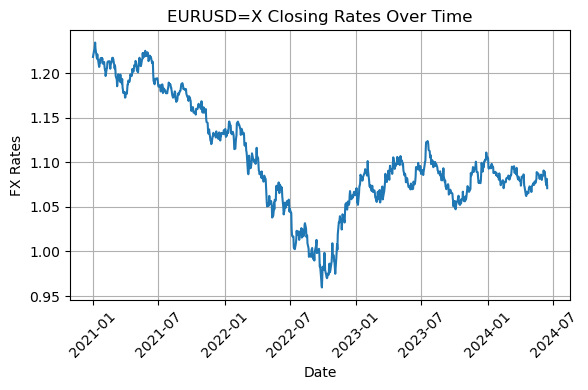

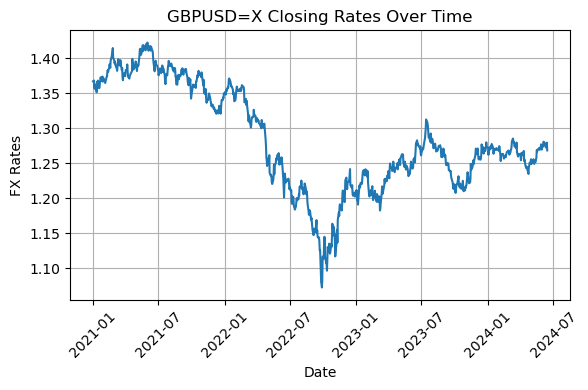

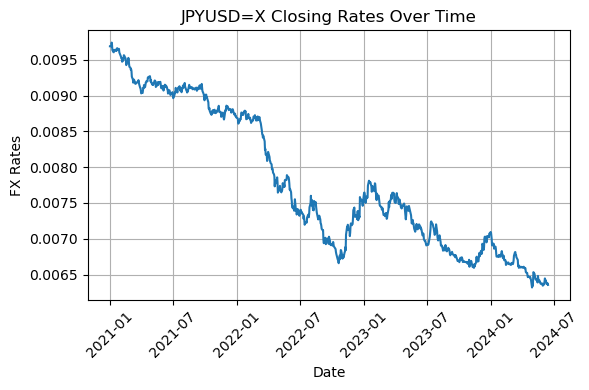

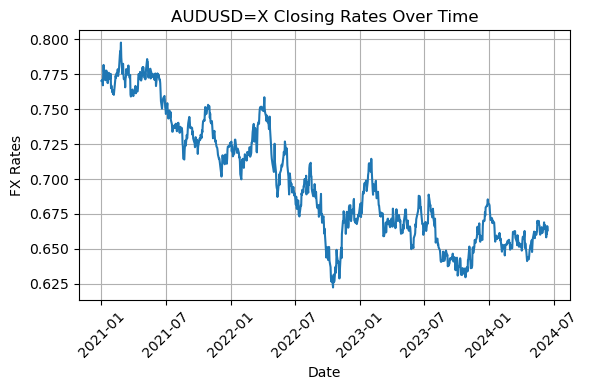

In [3]:
### Plot FX Rate Data
plot_forex(forex_data, forex_pairs)

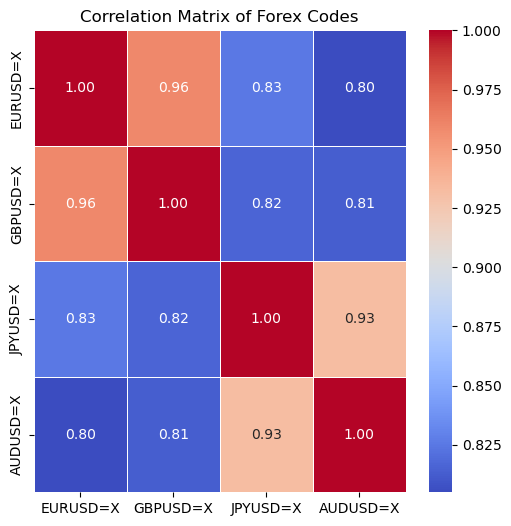

In [4]:
### Correlation Matrix Heatmap
corr_matrix(forex_data)

In [5]:
### Return Stacked Correlation -> Chose the forex pairs that are the most correlated (top of the list)
stacked_corr = stacked_correlations(forex_data)
print(stacked_corr.head(5))

GBPUSD=X  EURUSD=X    0.959202
EURUSD=X  GBPUSD=X    0.959202
AUDUSD=X  JPYUSD=X    0.931890
JPYUSD=X  AUDUSD=X    0.931890
          EURUSD=X    0.825391
dtype: float64


In [6]:
### Compute daily returns of Most Correlated Pairs
most_corr_pairs, returns = daily_rets_most_corr(forex_data)
print("Most correlated pairs:", most_corr_pairs)
returns.tail()


Most correlated pairs: ['GBPUSD=X', 'EURUSD=X']


,Date,GBPUSD=X,EURUSD=X
895,2024-06-10,-0.004990,-0.010606
896,2024-06-11,-0.000242,-0.001356
897,2024-06-12,0.001108,-0.002223
898,2024-06-13,0.004376,0.006780
899,2024-06-14,-0.008626,-0.009638


In [7]:
### Compute VAR
# Calculate the 95% Value at Risk (VaR) for each currency pair
# Ex. When EURUSD=X: -0.008645, that means with 95% confidence, the most that the EURUSD rate is expected to 
# lose in one day is approximately 0.8645% of its value.
VaR = returns.quantile(0.05)
print("Value at Risk (95% Confidence level):\n", VaR)

Value at Risk (95% Confidence level):
 Date        2021-03-07 20:24:00
GBPUSD=X              -0.009178
EURUSD=X              -0.007998
Name: 0.05, dtype: object


In [8]:
### Call Hedge Ratio Function
hedge_ratio = compute_hedge_ratio(most_corr_pairs, returns)
print("Hedge Ratio:", hedge_ratio)


Hedge Ratio: 0.6484724306049038


In [9]:
### Function Call to return Hedged and Unhedged Cumulative Returns
# Set value of Long Position
long_pos = 1000  
short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, most_corr_pairs, returns, hedge_ratio)
print("Long Position Size: ", long_pos)
print("Short Position Size: ", round(short_pos, 4))
print("Recent Hedged Cumulative Returns: ", hedged_cumulative_rets.tail(5))
print("Recent Unhedged Cumulative Returns: ", unhedged_cumulative_rets.tail(5))


Long Position Size:  1000
Short Position Size:  -648.4724
Recent Hedged Cumulative Returns:  895    1008.841634
896    1009.485022
897    1012.059385
898    1012.038858
899    1009.633850
dtype: float64
Recent Unhedged Cumulative Returns:  895    930.991085
896    930.765971
897    931.797642
898    935.875499
899    927.802262
Name: GBPUSD=X, dtype: float64


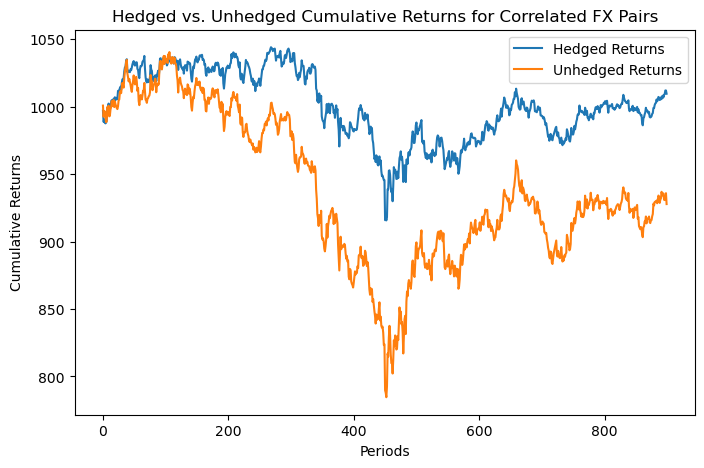

In [10]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [11]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, returns)

Metric                                  Hedged        Unhedged
Total Returns                           9.6338        -72.1977
Annualized Returns                      0.9385             nan
Mean Return                          1000.5849        938.2841
Standard Deviation                     25.8676         54.9120
Sharpe Ratio                          614.0427        271.2485

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 614.0427,
which means for every unit of risk, the hedged portfolio is generating 614.0427 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 271.2485,
indicating that for every unit of risk, the unhedged portfolio is generating 271.2485 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
